### ARIMA - AutoRegrassive Integrated Moving Average

ARIMA  performs very well when working with a time series where the data is
directly related to the time stamp, but it does not perform well with the data
which is not directly a function of a time(stock data)

it is important to keep in mind that an ARIMA model on that data wouldn't be able to
understand any outside factors, such as new developments in jet engines, if those
effects weren't already present in current data

ARIMA model is a generalization of an autoregressive moving average(ARMA) Model`m

Both ARMA and ARIMA models are fitted to time series data either to better
understand the data or to predict future points in the series(forecasting)

ARIMA (Auto Regressive Integrated Moving Average)

    Non-Seasonal ARIMA
    
    Seasonal ARIMA (SARIMA)
    
    SARIMAX

ARIMA models are applied in some cases where data show evidence of non-stationarity,
where an initial differnecing step(correspoinding to the "integrated" part of the model)
can be applied one or more times to eliminated the non-stationarity

Non-Seasonal ARIMA models are generally denoted ARIMA (p,d,q) where parameters
p,d, and q are non-negative integers.


Parts of ARIMA Model:
       1. AR (p): Auto Regression
                . A regression model that utilizes the dependent relationship  between current obeservation
                  observations over  a previous period.
       2. I (d): Integrated
                . Differncing of observations.
                  (subtracting an observation from an observation at at the previous time step) in order
                  to make the time series stationary.           
       3.MA (q): Moving Average
                . A model that uses the dependency between observation and residual error
                  from a moving average model applied to lagged observation.
        

### Stationarity vs Non-Stationarity

A Stationary series has Constant mean and variance  and covariance 
over a time

Stationary data set will allow our model to predict that the mean and variance will be same in future periods

<img 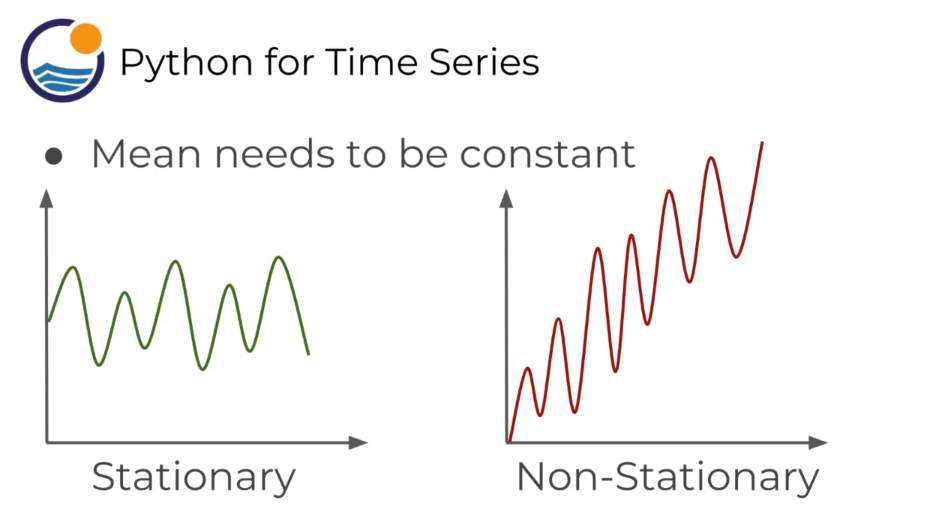

So basically Mean, vairance and covariance should not be function of time.
and they should be almost constant wrt changing time

< img 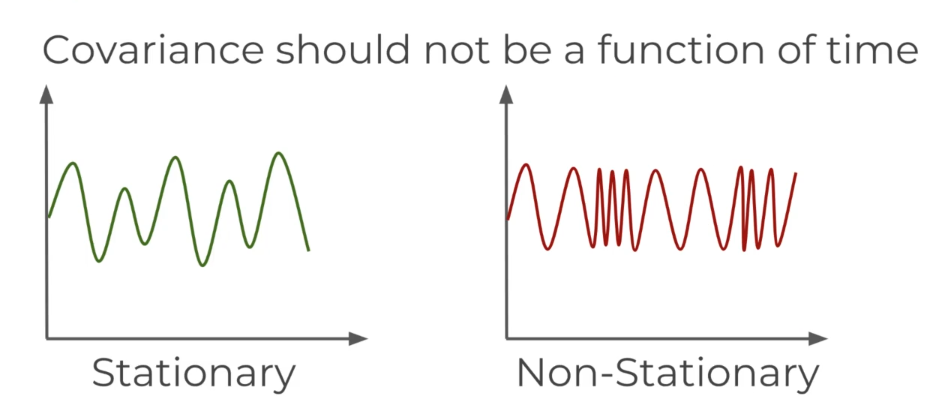

There are mathematical tests we can use to check stationarity of the data
Common test is Dickey-Fuller Test 

If you've determined your data is not stationary (either visually or mathermattically),you will then need
to transform it to be stationary in order to evaluate it and what type of ARIMA terms you will use.

one simple way to do this is through "Differencing"

Differencing example
<img 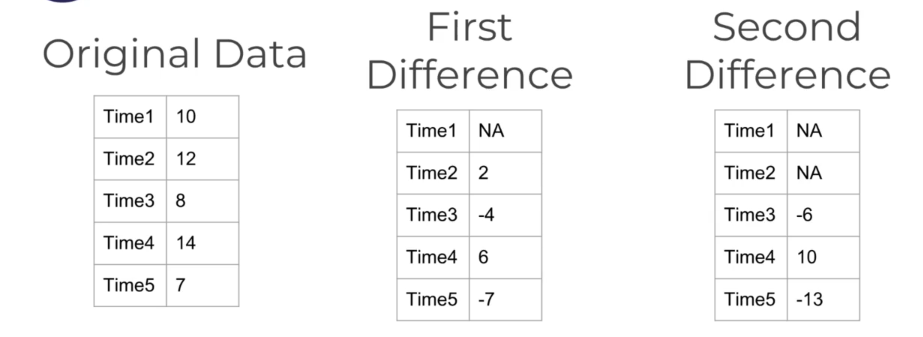

You can continue differencing until you reach stationarity (which we can check visually and mathematically)
Each differncing step comes at the cost of losing a row of data!

For Seasonal Data, You can also difference by a season.
eg. if you had monthly data with yearly seasonality, you could difference by a time unit of 12,
instead of just 1

Another common technique with seasonal ARIMA models is to combine both methods,
taking the seasonal difference of first difference

### How to choose p,d and q term

Method 1(Difficult):
    1. Autocorrelation plots and partial autocorelation plots.
    2. using these plots we can choose p,d and q terms based on viewing decay in plot

Method 2 (Easy but takes time):
    1. Grid Search
    2. Run ARIMA based models on different combinations of p,d and q and compare the models
        for on some evaluation metric.
 

 SARIMA - is very similar to ARIMA , but it adds another set of parameters (P,D,Q) for seasonal components.

## AutoRegression -AR Models

In moving average model as we saw with Holt-Winters, we forecast the variable
of interst using a linear combination of predictors.

In autoregression model, we forecast using linear combination of past values of variable.
The term autoregression describes a regression of a variable against itself. An Auto regression is run against
a set of lapped values of order p.

The autoregressive model specifies that the output variable depends linearly on its own previous values and
on stochastic term (an imperfectly predictable term)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
df = pd.read_csv('../Data/uspopulation.csv',index_col='DATE',parse_dates=True)

In [4]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [5]:
df.index.freq='MS'

In [6]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [7]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


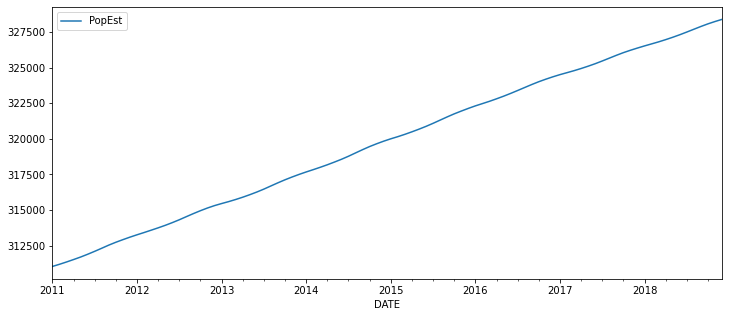

In [8]:
df.plot(figsize=(12,5))
# we can see a linear trend here with bit seasonality.

In [9]:
## Splitting our data into Training and testing 

In [10]:
len(df) # we have 96 months of data--8years

96

In [11]:
96-12

84

In [12]:
train = df.iloc[:84]

In [13]:
test = df.iloc[84:]

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#AR Model
model = AR(train['PopEst'])

In [16]:
AR1fit = model.fit(maxlag=1) #maxlag defines the order of lag of AR

In [17]:
AR1fit.aic

6.410771237031904

In [18]:
AR1fit.k_ar # no.of lags

1

In [19]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [20]:
start = len(train)

In [21]:
end = len(train) + len(test) -1 

In [22]:
start

84

In [23]:
end

95

In [24]:
AR1fit.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [25]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [26]:
predictions1 = AR1fit.predict(start=start,end=end)

In [27]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [28]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

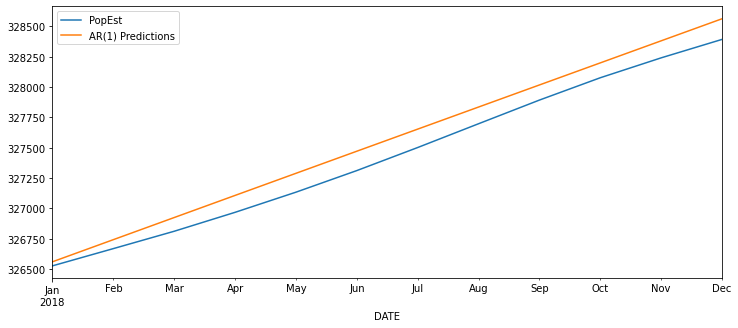

In [29]:
test.plot(figsize=(12,5),legend=True)
predictions1.plot(legend=True)

In [30]:
## increasing order from 1 to 2

In [31]:
model1 = AR(train['PopEst'])

In [32]:
AR2fit = model1.fit(maxlag=2)

In [33]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [34]:
predictions2 = AR2fit.predict(start,end)

In [35]:
predictions2 = predictions2.rename('AR(2) Predictions')

In [36]:
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882249
2018-04-01    327015.944947
2018-05-01    327177.719497
2018-06-01    327340.045893
2018-07-01    327502.787327
2018-08-01    327665.826842
2018-09-01    327829.064475
2018-10-01    327992.414803
2018-11-01    328155.804852
2018-12-01    328319.172299
Freq: MS, Name: AR(2) Predictions, dtype: float64

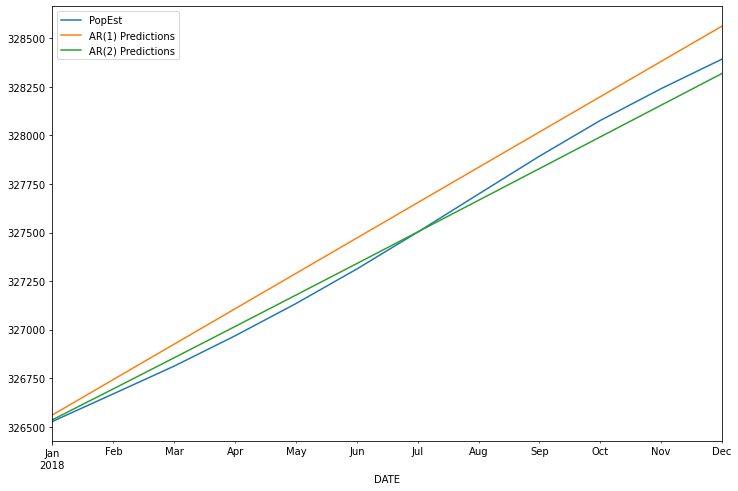

In [37]:
test.plot(figsize=(12,8),legend =True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [38]:
## How to get best p values.. we can use statsmodel to choose best p values for us.
model2 = AR(train['PopEst'])
ARfit = model2.fit(ic='t-stat') # best on aic model shows 10 lags

In [39]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [40]:
predictions8 = ARfit.predict(start,end)

In [41]:
predictions8 = predictions8.rename('AR(10) Prediction')

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
labels = ['AR1','AR2','AR8']

In [44]:
preds = [predictions1,predictions2,predictions8]

In [45]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :17449.714242014332
AR2 MSE was :2713.258956718333
AR8 MSE was :186.9746864758957


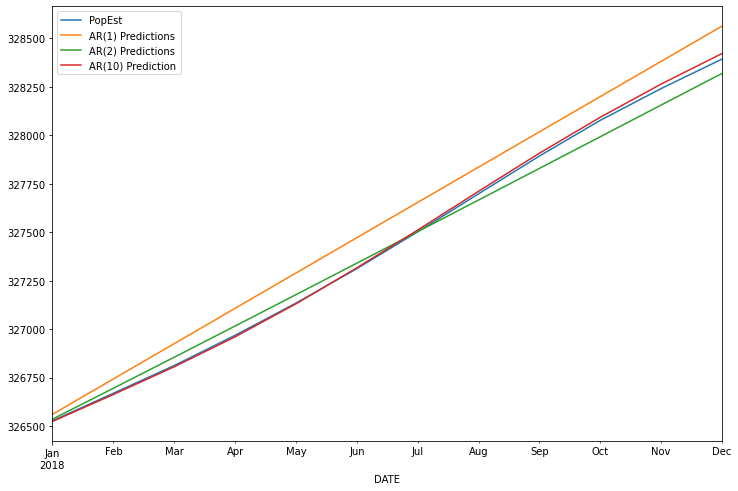

In [46]:
test.plot(figsize=(12,8),legend =True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [47]:
### forcasting on future data..Lets Predict Us population for 2020

In [51]:
##Retraing our model on full data

model = AR(df['PopEst'])

ARfit = model.fit()

forecasted_values = ARfit.predict(start=len(df),end=len(df)+24).rename('Forecast')

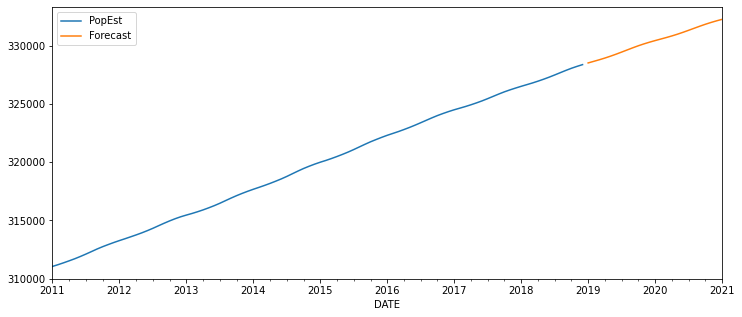

In [52]:
df['PopEst'].plot(figsize=(12,5),legend=True)
forecasted_values.plot(legend=True)

In [53]:
forecasted_values

2019-01-01    328537.420471
2019-02-01    328673.215517
2019-03-01    328810.443271
2019-04-01    328957.593013
2019-05-01    329117.336017
2019-06-01    329289.277371
2019-07-01    329470.144429
2019-08-01    329655.073816
2019-09-01    329839.483248
2019-10-01    330015.435252
2019-11-01    330175.676320
2019-12-01    330322.580551
2020-01-01    330459.617768
2020-02-01    330589.980945
2020-03-01    330720.645135
2020-04-01    330858.631518
2020-05-01    331008.625699
2020-06-01    331171.296119
2020-07-01    331343.207232
2020-08-01    331519.079664
2020-09-01    331693.967555
2020-10-01    331861.249261
2020-11-01    332015.235271
2020-12-01    332155.794128
2021-01-01    332285.712142
Freq: MS, Name: Forecast, dtype: float64